In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
data = pd.read_csv('Rat_Sightings.csv')

In [3]:
data = data.iloc[:, 24:26]

Esse é um jeito de plotar

In [4]:
# plt.grid('on')
# plt.scatter(data['X Coordinate (State Plane)'], data['Y Coordinate (State Plane)'])
# plt.show()

Text(0,0.5,'Y Rats Coordinate')

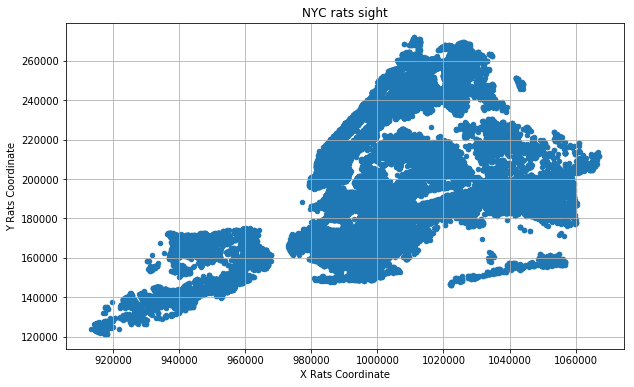

In [5]:
ax = data.plot(kind='scatter', x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', title='NYC rats sight', figsize=(10,6),grid=True);
ax.set_xlabel('X Rats Coordinate')
ax.set_ylabel('Y Rats Coordinate')

In [6]:
#X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
#X.shape
list1=list(data['X Coordinate (State Plane)'])
list2=list(data['Y Coordinate (State Plane)'])
X = zip(list1,list2)
dt=np.dtype('int')
listaSemNaN=[]
X=list(X)
for i in range(0,len(X)):
    tup=X[i]
    if((X[i][0] == X[i][0]) is False or (X[i][1] == X[i][1]) is False):
        nada = 0 #print "Não é NaN"
    else:
        listaSemNaN.append(tup)

In [7]:
X = np.array(listaSemNaN,dtype=dt)

In [8]:
#train_data = data.sample(frac=0.01, random_state=200)
#test_data  = data.drop(train_data.index)
#print(train_data.shape, test_data.shape)

# Compute clustering method: kmeans++.

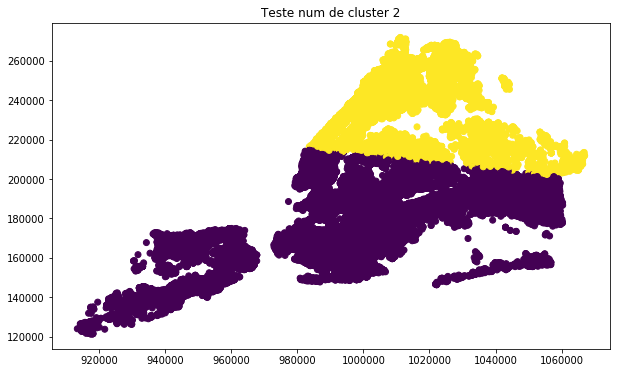

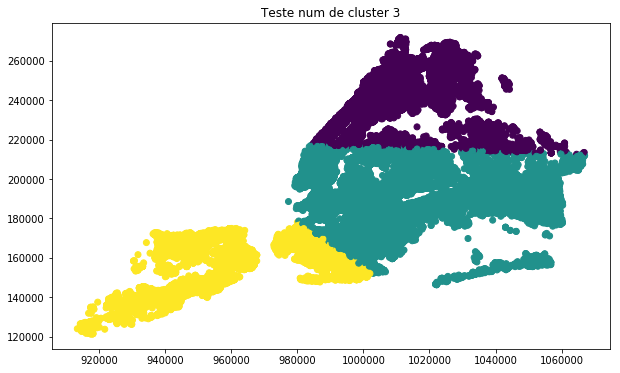

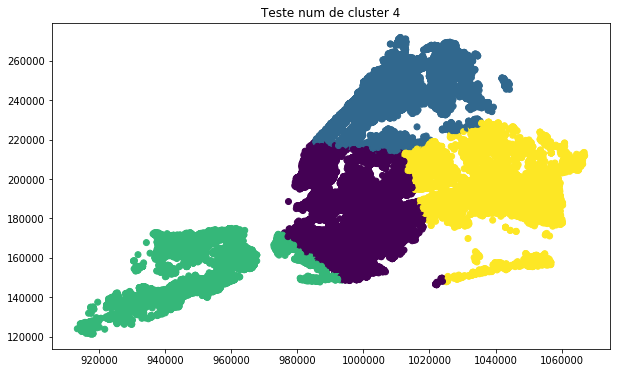

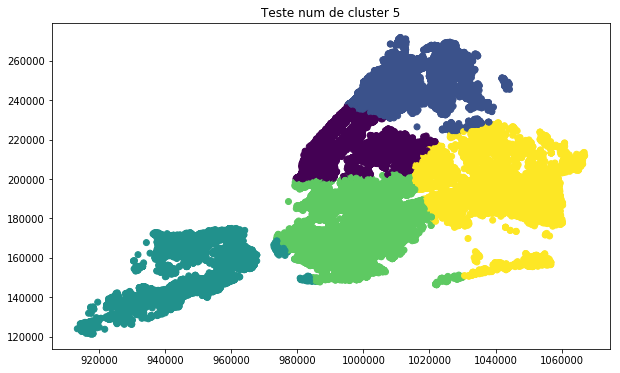

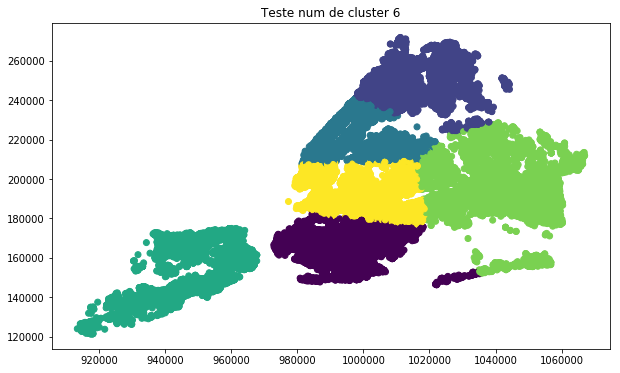

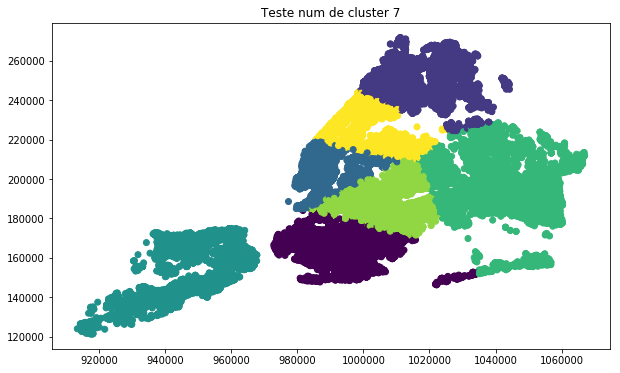

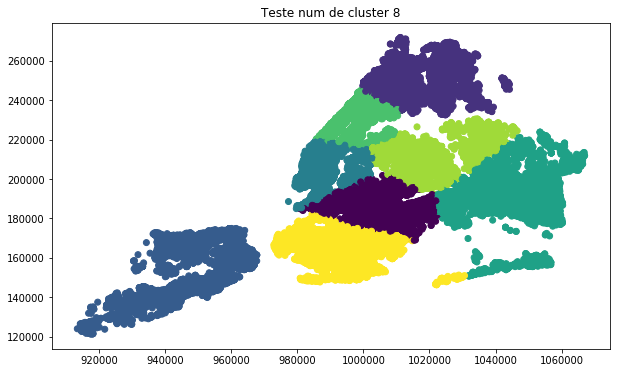

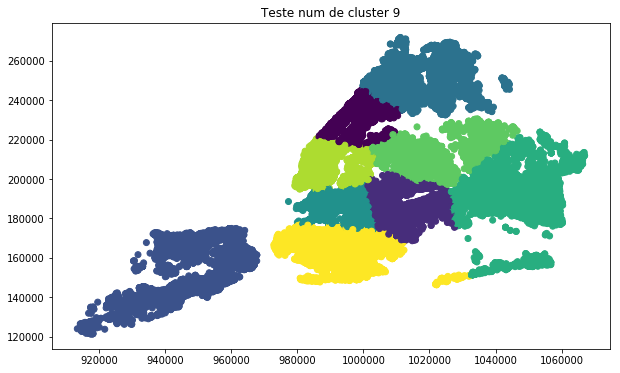

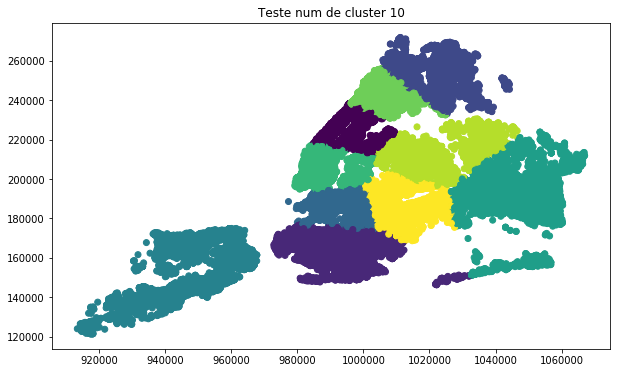

In [9]:
for numero in range(2,11):
    kmeanss = KMeans(n_clusters=numero, random_state=0).fit_predict(X)
    plt.figure(figsize=(10,6))
    #plt.subplot(222)
    plt.scatter(X[:, 0], X[:, 1], c=kmeanss)
    plt.title("Teste num de cluster "+str(numero))

# Compute clustering method: MeanShift

In [10]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
Xblob, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [11]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Xblob, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(Xblob)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


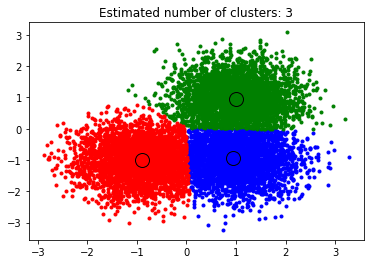

In [12]:
# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(Xblob[my_members, 0], Xblob[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [13]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=10000)

In [14]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=21382.768702385692, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [16]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


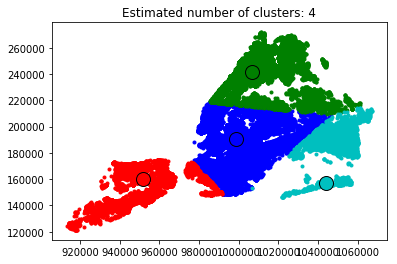

In [17]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Text(0.5,1,'Teste num de cluster 4')

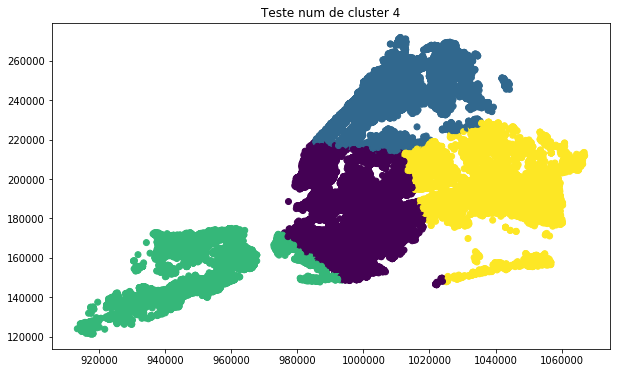

In [18]:
kmeanss = KMeans(n_clusters=4, random_state=0).fit_predict(X)
plt.figure(figsize=(10,6))
#plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=kmeanss)
plt.title("Teste num de cluster "+str(4))
